Data type: <class 'numpy.ndarray'>
Content type: <class 'dict'>
Data keys: dict_keys(['blank', 'stimulus'])
Stimulus data shape: (150, 32)
Blank data shape: (150, 32)


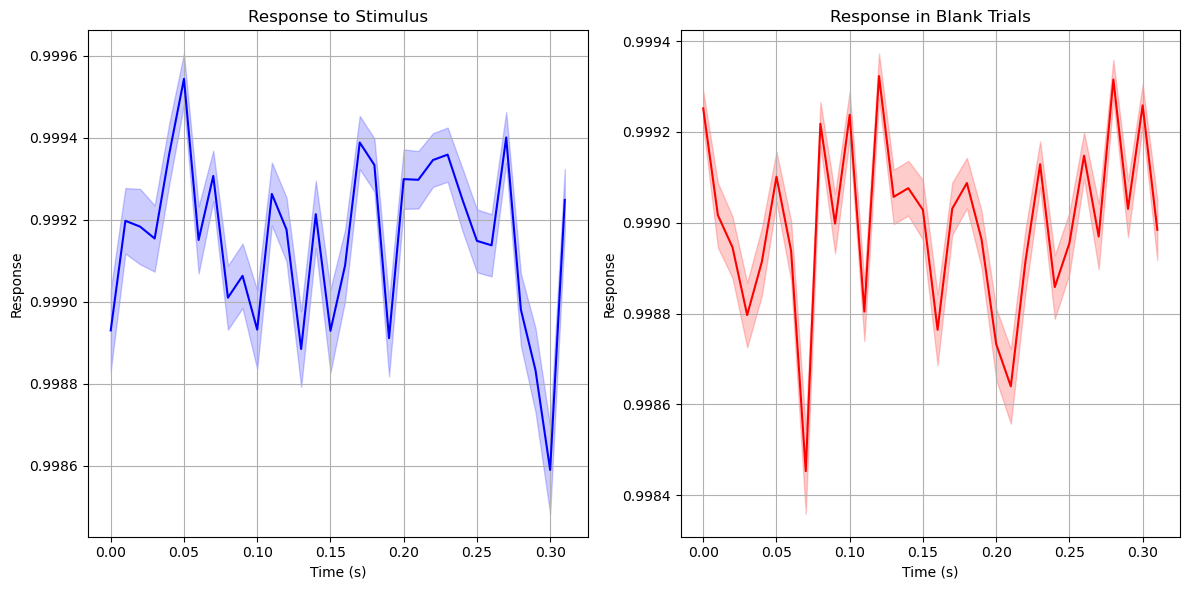

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch



def plot_responses_with_sem(data_path):
    # Load the data with pickling enabled
    data = np.load(data_path, allow_pickle=True)

    # Print the type and structure of the data
    print("Data type:", type(data))

    # Handle data as per its structure
    if isinstance(data, np.ndarray) and data.dtype == 'O':
        # Extract the stored object
        content = data.item()  # Extract the stored object
        print("Content type:", type(content))
        
        # Assuming it's a dictionary-like structure
        if isinstance(content, dict):
            print("Data keys:", content.keys())
            stimulus = content['stimulus']
            blank = content['blank']
        else:
            raise ValueError("Unexpected content structure.")
    else:
        raise ValueError("Data is not in the expected format.")

    # Check the shape of each dataset
    print("Stimulus data shape:", np.shape(stimulus))
    print("Blank data shape:", np.shape(blank))

    # Calculate the time vector based on the number of samples
    num_samples = stimulus.shape[1]
    time = np.linspace(0, (num_samples - 1) / 100, num_samples)

    # Calculate the mean and SEM for each condition
    stimulus_mean = np.mean(stimulus, axis=0)
    blank_mean = np.mean(blank, axis=0)
    stimulus_sem = np.std(stimulus, axis=0, ddof=1) / np.sqrt(stimulus.shape[0])
    blank_sem = np.std(blank, axis=0, ddof=1) / np.sqrt(blank.shape[0])

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot stimulus condition
    plt.subplot(1, 2, 1)
    plt.plot(time, stimulus_mean, label='Stimulus', color='blue')
    plt.fill_between(time, stimulus_mean - stimulus_sem, stimulus_mean + stimulus_sem, color='blue', alpha=0.2)
    plt.title('Response to Stimulus')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.grid(True)

    # Plot blank condition
    plt.subplot(1, 2, 2)
    plt.plot(time, blank_mean, label='Blank', color='red')
    plt.fill_between(time, blank_mean - blank_sem, blank_mean + blank_sem, color='red', alpha=0.2)
    plt.title('Response in Blank Trials')
    plt.xlabel('Time (s)')
    plt.ylabel('Response')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Path to the data file
data_path = 'var4students.npy'
plot_responses_with_sem(data_path)


In [27]:

# Load the data from the .npy file
data_path = 'var4students.npy'
data = np.load(data_path, allow_pickle=True)

if isinstance(data, np.ndarray) and data.dtype == 'O':
    # Extract the dictionary from the array
    content = data.item()
    if isinstance(content, dict):
        stimulus = content['stimulus']
        blank = content['blank']
        # Display the shapes to understand the structure
        print("Stimulus shape:", stimulus.shape)
        print("Blank shape:", blank.shape)


Stimulus shape: (150, 32)
Blank shape: (150, 32)


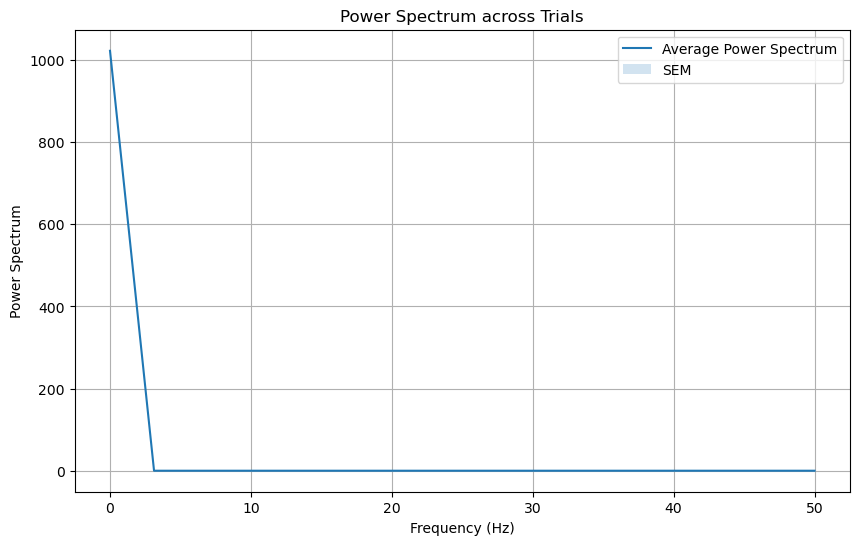

In [3]:
def plot_power_spectrum(data, sample_rate):
    # Number of trials and samples per trial
    n_trials, n_samples = data.shape
    
    # Time vector (based on sample rate)
    t = np.linspace(0, n_samples / sample_rate, n_samples, endpoint=False)
    
    # Fourier Transform to compute frequencies
    fft_data = np.fft.rfft(data, axis=1)
    frequencies = np.fft.rfftfreq(n_samples, d=1/sample_rate)
    
    # Power spectrum density
    power_spectrum = np.abs(fft_data)**2
    
    # Average and SEM of power spectrum across trials
    avg_power_spectrum = np.mean(power_spectrum, axis=0)
    sem_power_spectrum = np.std(power_spectrum, axis=0, ddof=1) / np.sqrt(n_trials)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, avg_power_spectrum, label='Average Power Spectrum')
    plt.fill_between(frequencies, avg_power_spectrum - sem_power_spectrum, avg_power_spectrum + sem_power_spectrum, alpha=0.2, label='SEM')
    plt.title('Power Spectrum across Trials')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectrum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the data from the .npy file
data_path = 'var4students.npy'
data = np.load(data_path, allow_pickle=True).item()

stimulus = data['stimulus']
blank = data['blank']

# Sample rate is given as 100 Hz
plot_power_spectrum(stimulus, 100)


/var/folders/5z/_bmq08v96_bd41dgf6nbtmvc0000gn/T/ipykernel_64222/2116418357.py:44: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs[:len(freqs)//2], np.abs(X_sampled)[:len(freqs)//2], basefmt=" ", use_line_collection=True)


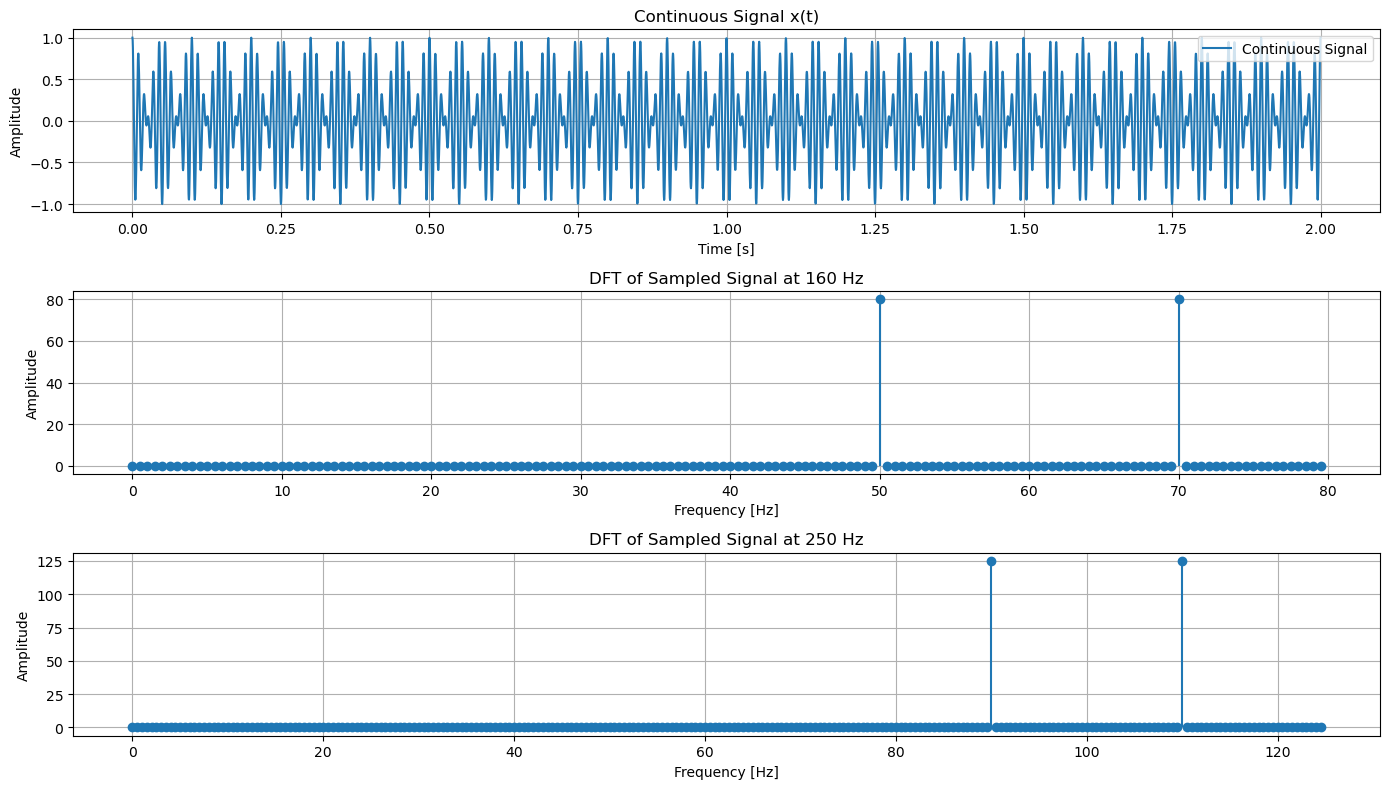

In [4]:

# Define the signal parameters
a = 10  # frequency component a in Hz
b = 100  # frequency component b in Hz
t_max = 2  # signal duration in seconds

# Create a time vector for the continuous signal
t_continuous = np.linspace(0, t_max, 5000)  # 5000 points for smooth plotting

# Define the continuous signal
x_continuous = np.cos(2 * np.pi * a * t_continuous) * np.cos(2 * np.pi * b * t_continuous)

# Define sampling rates
sampling_rates = [160, 250]  # Hz

# Create a figure for the plots
plt.figure(figsize=(14, 8))

# Plot the continuous signal
plt.subplot(3, 1, 1)
plt.plot(t_continuous, x_continuous, label='Continuous Signal')
plt.title('Continuous Signal x(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

# Function to plot DFT for each sampling rate
for i, fs in enumerate(sampling_rates):
    # Create a time vector for the sampled signal
    t_sampled = np.arange(0, t_max, 1/fs)
    
    # Sample the signal
    x_sampled = np.cos(2 * np.pi * a * t_sampled) * np.cos(2 * np.pi * b * t_sampled)
    
    # Compute the DFT
    X_sampled = np.fft.fft(x_sampled)
    freqs = np.fft.fftfreq(len(X_sampled), 1/fs)
    
    # Plot the sampled signal
    plt.subplot(3, 1, 2 + i)
    plt.stem(freqs[:len(freqs)//2], np.abs(X_sampled)[:len(freqs)//2], basefmt=" ", use_line_collection=True)
    plt.title(f'DFT of Sampled Signal at {fs} Hz')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()


In [5]:
# Load the .npy file 
data = np.load('filters.npy', allow_pickle=True)

# Print the data to see its content and structure
print("Data loaded from the .npy file:")
print(data)

# Check and print the type of the data
print("Type of data loaded:")
print(type(data))

if isinstance(data, np.ndarray):
    print("Shape of the array:", data.shape)
    print("Data type of the array:", data.dtype)


Data loaded from the .npy file:
{'filtVec': array([[0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
        0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
        0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
        0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
        0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
        0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
        0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
        0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
        0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
        0.02      , 0.02      , 0.02      , 0.02      , 0.02      ],
       [0.00200861, 0.00255344, 0.00321376, 0.00400459, 0.00494038,
        0.00603419, 0.00729684, 0.00873591, 0.01035471, 0.01215137,
        0.01411788, 0.01623942, 0.01849392, 0.02085183, 0.02327644,
        0.02572445, 0.02814703, 0.03049131, 0.03270218, 0.03472437,
   

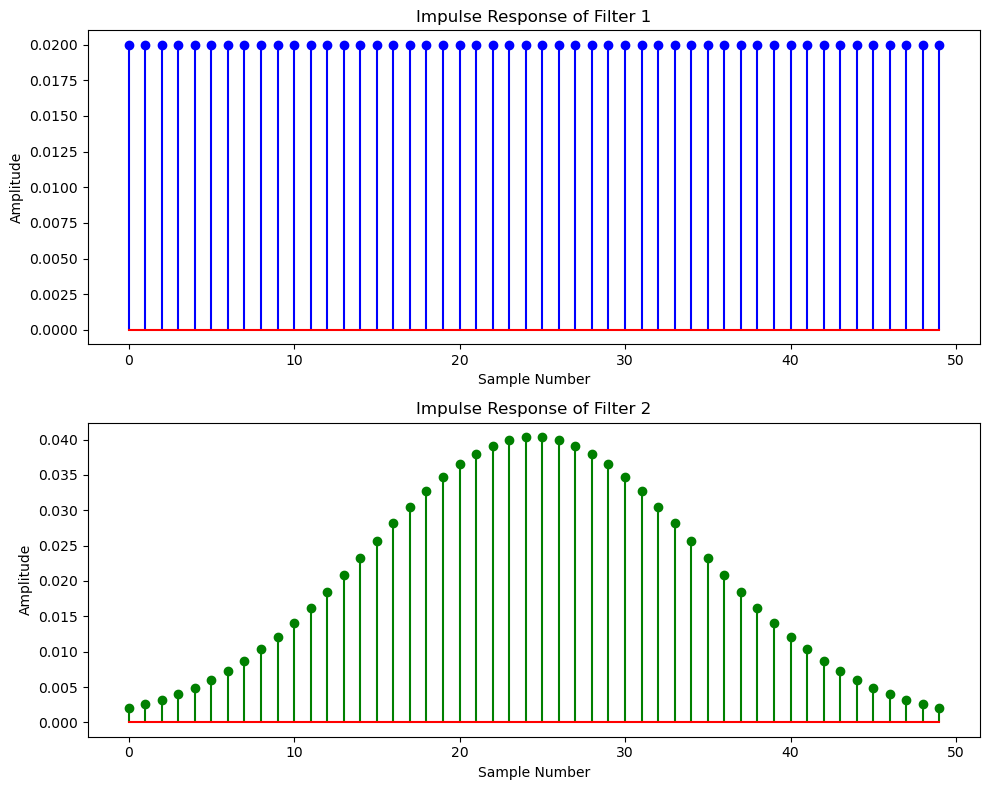

In [28]:
# Load the .npy file
data = np.load('filters.npy', allow_pickle=True).item()

# Extract filter vectors
filtVec = data['filtVec']
filter1 = filtVec[0, :]  # First filter coefficients
filter2 = filtVec[1, :]  # Second filter coefficients

# Initialize a new figure for plotting
plt.figure(figsize=(10, 8))

# Plot Impulse Response for Filter 1
plt.subplot(2, 1, 1)
plt.stem(filter1, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Impulse Response of Filter 1')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

# Plot Impulse Response for Filter 2
plt.subplot(2, 1, 2)
plt.stem(filter2, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title('Impulse Response of Filter 2')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')

# Show the plots
plt.tight_layout()
plt.show()


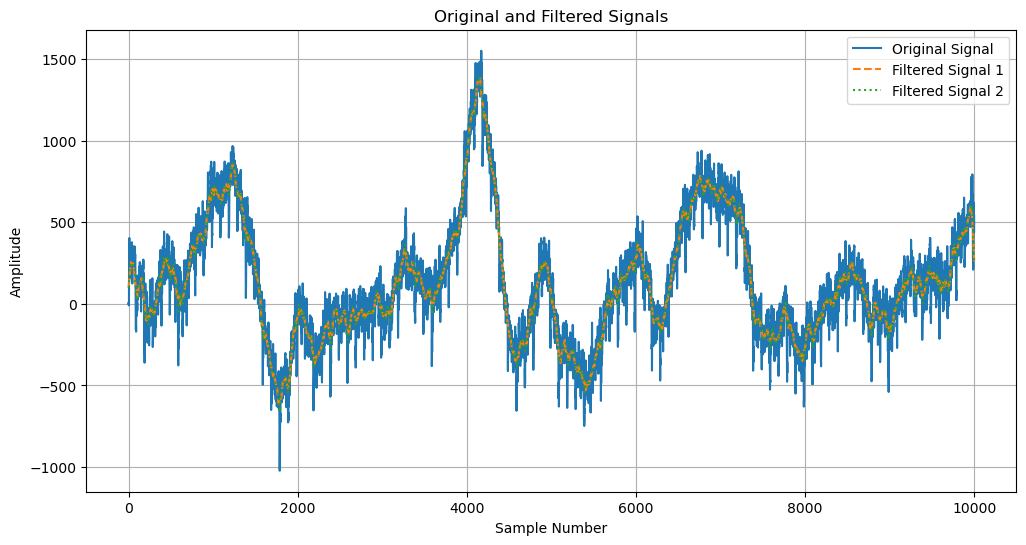

In [31]:

# Load the filter coefficients and the original data from a .npy file
data = np.load('filters.npy', allow_pickle=True).item()
filtVec = data['filtVec']
dataVec = data['dataVec'][0]  # Assuming dataVec is stored as a 2D array, take the first row

# Extract individual filters
filter1 = filtVec[0, :]
filter2 = filtVec[1, :]

# Perform convolution to filter the signal
filtered_signal1 = np.convolve(dataVec, filter1, mode='same')  # 'same' returns the central part of the convolution, same size as dataVec
filtered_signal2 = np.convolve(dataVec, filter2, mode='same')

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.plot(dataVec, label='Original Signal', linewidth=1.5)
plt.plot(filtered_signal1, label='Filtered Signal 1', linestyle='--')
plt.plot(filtered_signal2, label='Filtered Signal 2', linestyle=':')
plt.title('Original and Filtered Signals')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


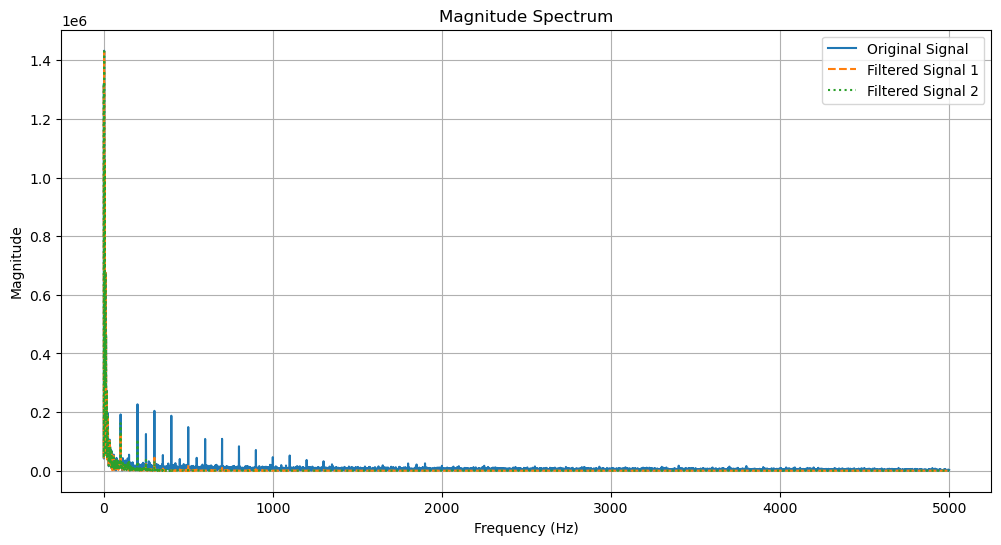

In [30]:

# Compute the DFT of the original and filtered signals
dft_original = np.fft.fft(dataVec)
dft_filtered1 = np.fft.fft(filtered_signal1)
dft_filtered2 = np.fft.fft(filtered_signal2)

# Compute the frequencies corresponding to the DFT coefficients
n = len(dataVec)
freq = np.fft.fftfreq(n, d=1/10000)  # d is the sampling interval, 1/10000 Hz

# Plot the magnitude of the DFTs
plt.figure(figsize=(12, 6))
plt.plot(freq[:n // 2], np.abs(dft_original)[:n // 2], label='Original Signal')
plt.plot(freq[:n // 2], np.abs(dft_filtered1)[:n // 2], label='Filtered Signal 1', linestyle='--')
plt.plot(freq[:n // 2], np.abs(dft_filtered2)[:n // 2], label='Filtered Signal 2', linestyle=':')
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()


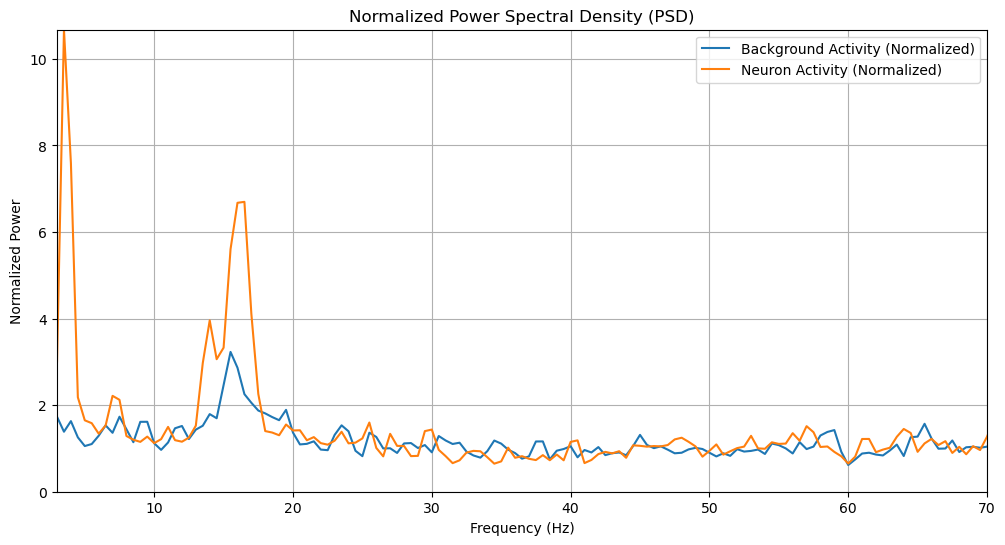

In [32]:

from scipy.signal import welch
from scipy.sparse import csc_matrix

# Load the data from the .npy file
data = np.load('coherence.npy', allow_pickle=True).item()

# Convert 'fwrsig_nospikes' and 'st' to dense arrays if necessary
fwrsig_nospikes = np.array(data['fwrsig_nospikes']).flatten()

# Check if 'st' is a sparse matrix and convert to a dense array
if isinstance(data['st'], csc_matrix):
    st = data['st'].toarray().flatten()  # Convert sparse to dense and flatten
else:
    st = np.array(data['st']).flatten()

# Sampling frequency
fs = 24038  # Hz

# Calculate nperseg ensuring it doesn't exceed the signal length
signal_length = len(fwrsig_nospikes)
nperseg = min(int(fs / 0.5), signal_length)

# Compute the PSD using Welch's method
frequencies_fwrsig, psd_fwrsig = welch(fwrsig_nospikes, fs=fs, nperseg=nperseg, noverlap=0)
frequencies_st, psd_st = welch(st, fs=fs, nperseg=nperseg, noverlap=0)

# Define the frequency range for normalization
freq_range = (frequencies_fwrsig >= 30) & (frequencies_fwrsig <= 70)

# Normalize the PSD by the mean power in the 30-70 Hz range
mean_power_fwrsig = np.mean(psd_fwrsig[freq_range])
mean_power_st = np.mean(psd_st[freq_range])

psd_fwrsig_normalized = psd_fwrsig / mean_power_fwrsig
psd_st_normalized = psd_st / mean_power_st

# Plot the normalized PSDs on the same axes, focusing on the 3-70 Hz range
plt.figure(figsize=(12, 6))
plt.plot(frequencies_fwrsig, psd_fwrsig_normalized, label='Background Activity (Normalized)')
plt.plot(frequencies_st, psd_st_normalized, label='Neuron Activity (Normalized)')
plt.xlim(3, 70)
plt.ylim(0, max(psd_fwrsig_normalized.max(), psd_st_normalized.max()))
plt.title('Normalized Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Power')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
mean_power_fwrsig = np.mean(psd_fwrsig[freq_range])
mean_power_st = np.mean(psd_st[freq_range])
mean_power_fwrsig = np.mean(psd_fwrsig_normalized[freq_range])

std_power_fwrsig = np.std(psd_fwrsig_normalized[freq_range])
threshold_fwrsig = mean_power_fwrsig + 3 * std_power_fwrsig
std_power_st = np.std(psd_st_normalized[freq_range])
threshold_st = mean_power_st + 3 * std_power_st


# Adjusted threshold calculation using 3 standard deviations instead of 5
threshold_fwrsig_adjusted = mean_power_fwrsig + 3 * std_power_fwrsig
threshold_st_adjusted = mean_power_st + 3 * std_power_st

# Identify frequencies where the normalized power exceeds the adjusted threshold
important_freqs_fwrsig_adjusted = frequencies_fwrsig[(psd_fwrsig_normalized > threshold_fwrsig_adjusted) & freq_range]
important_freqs_st_adjusted = frequencies_st[(psd_st_normalized > threshold_st_adjusted) & freq_range]

# Print adjusted important frequencies
print(important_freqs_fwrsig_adjusted)
print(important_freqs_st_adjusted)


[65.5]
[30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.  35.5 36.  36.5
 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5 42.  42.5 43.  43.5
 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5 49.  49.5 50.  50.5
 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5 56.  56.5 57.  57.5
 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5 63.  63.5 64.  64.5
 65.  65.5 66.  66.5 67.  67.5 68.  68.5 69.  69.5 70. ]


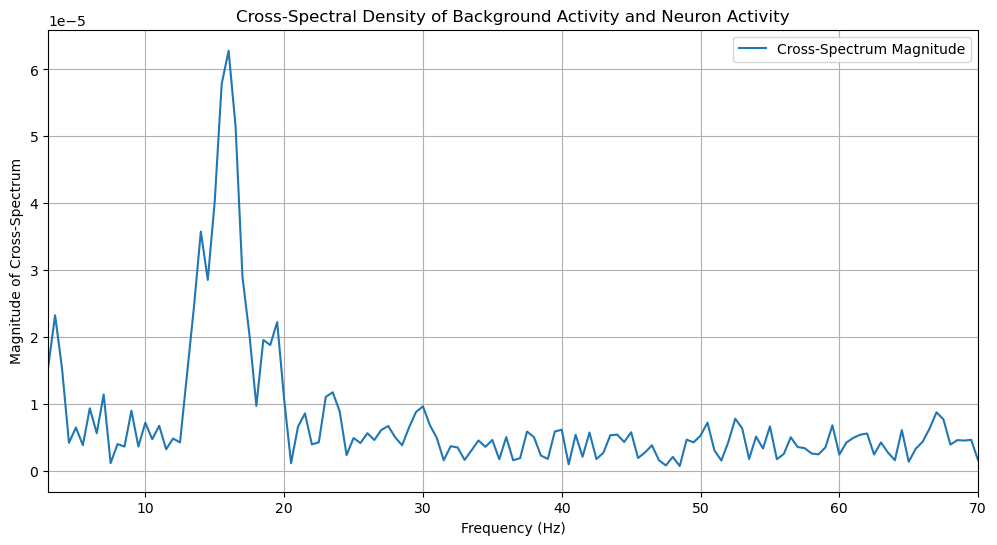

In [34]:

from scipy.signal import welch, csd

# Compute the cross-spectral density
frequencies, Pxy = csd(fwrsig_nospikes, st, fs=fs, nperseg=nperseg, noverlap=0)

# Calculate the magnitude of the cross-spectrum
magnitude_Pxy = np.abs(Pxy)

# Plot the cross-spectral density
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude_Pxy, label='Cross-Spectrum Magnitude')
plt.xlim(3, 70)  # Focus on the 3-70 Hz range
plt.title('Cross-Spectral Density of Background Activity and Neuron Activity')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude of Cross-Spectrum')
plt.legend()
plt.grid(True)
plt.show()


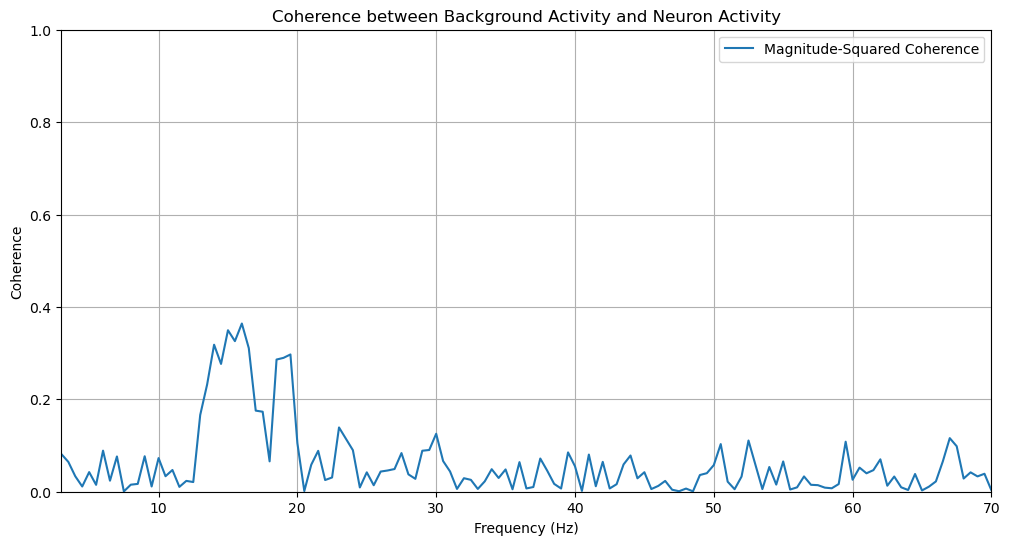

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, csd, coherence

# Compute the coherence using the coherence function from scipy.signal
frequencies, Cxy = coherence(fwrsig_nospikes, st, fs=fs, nperseg=nperseg, noverlap=0)

# Plot the coherence
plt.figure(figsize=(12, 6))
plt.plot(frequencies, Cxy, label='Magnitude-Squared Coherence')
plt.xlim(3, 70)  # Focus on the 3-70 Hz range
plt.ylim(0, 1)  # Coherence ranges from 0 to 1
plt.title('Coherence between Background Activity and Neuron Activity')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
from scipy.signal import firwin, filtfilt

def robust_bandpass_filter(data, lowcut, highcut, fs, numtaps=101):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    try:
        taps = firwin(numtaps, [low, high], pass_zero=False)
        y = filtfilt(taps, [1.0], data)
    except Exception as e:
        print(f"Error in FIR filter design: {e}")
        return None
    return y

# Apply the FIR filter to the background signal
filtered_background_10 = robust_bandpass_filter(fwrsig_nospikes, 8, 12, fs)
filtered_background_20 = robust_bandpass_filter(fwrsig_nospikes, 18, 22, fs)


from scipy.signal import hilbert

# Apply Hilbert transform to obtain the analytic signals
analytic_signal_10 = hilbert(filtered_background_10)
analytic_signal_20 = hilbert(filtered_background_20)

# Extract instantaneous phases
instant_phase_10 = np.angle(analytic_signal_10)
instant_phase_20 = np.angle(analytic_signal_20)

# Assume st contains binary values with 1s at spike times
spike_times = np.where(st > 0)[0]

# Extract phases at spike times for each frequency
spike_phases_10 = instant_phase_10[spike_times]
spike_phases_20 = instant_phase_20[spike_times]



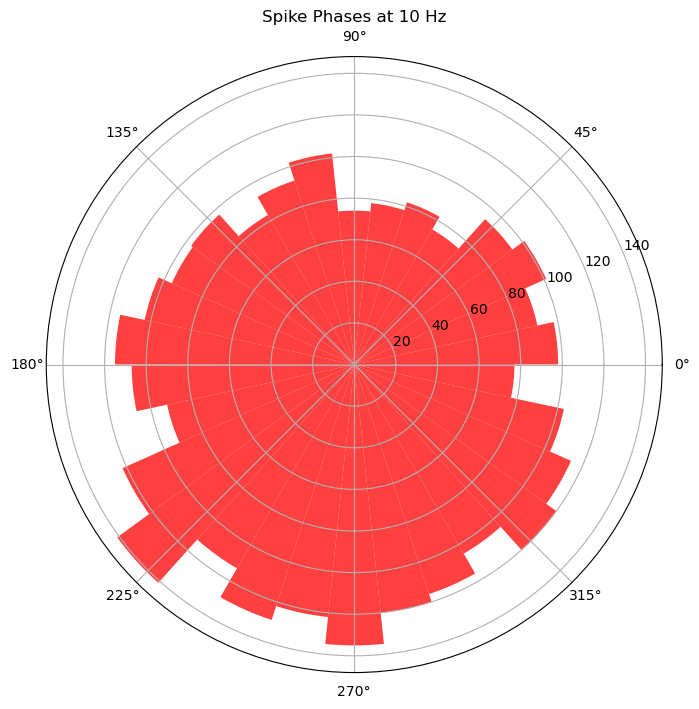

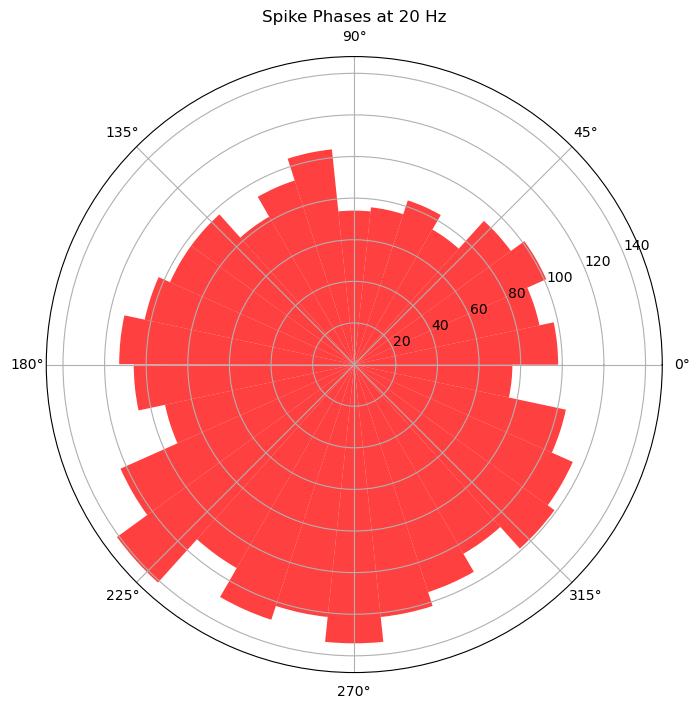

In [35]:
from scipy.stats import circmean

def plot_polar_histogram(phases, title):
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    # Compute histogram
    num_bins = 30
    counts, bin_edges = np.histogram(phases, bins=num_bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    # Plot
    ax.bar(bin_centers, counts, width=np.diff(bin_edges), bottom=0.0, color='r', alpha=0.75)
    plt.title(title)
    plt.show()

# Plot polar histograms
plot_polar_histogram(spike_phases_10, 'Spike Phases at 10 Hz')
plot_polar_histogram(spike_phases_20, 'Spike Phases at 20 Hz')


In [24]:
# Calculate circular mean for phases
mean_phase_10 = circmean(spike_phases_10)
mean_phase_20 = circmean(spike_phases_20)

print(f'Most frequent phase at 10 Hz: {mean_phase_10:.2f}')
print(f'Most frequent phase at 20 Hz: {mean_phase_20:.2f}')


Most frequent phase at 10 Hz: 4.42
Most frequent phase at 20 Hz: 4.41
